In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Descargar datos históricos del S&P 500
sp500 = yf.Ticker("^GSPC")
history = sp500.history(period="max")


$^GSPC: possibly delisted; no price data found  (1d 1926-04-06 -> 2025-03-12)


In [3]:
# Supongamos que se obtienen datos de EPS (puedes agregar manualmente o usar una API)
# EPS promedio estimado (a modo de ejemplo)
eps_values = {
    "1995-01-01": 200,  # Reemplazar con valores reales
    "2024-12-01": 210,  # Reemplazar con valores reales
}


In [4]:
# Crear DataFrame de EPS
eps_df = pd.DataFrame.from_dict(eps_values, orient="index", columns=["EPS"])
eps_df.index = pd.to_datetime(eps_df.index, errors='coerce')

In [5]:
# Convert history index to timezone-naive
history.index = history.index.tz_localize(None)

# Mergear EPS con precios
merged_df = history[["Close"]].join(eps_df, how="outer").ffill()
merged_df["P/E"] = merged_df["Close"] / merged_df["EPS"]

AttributeError: 'Index' object has no attribute 'tz_localize'

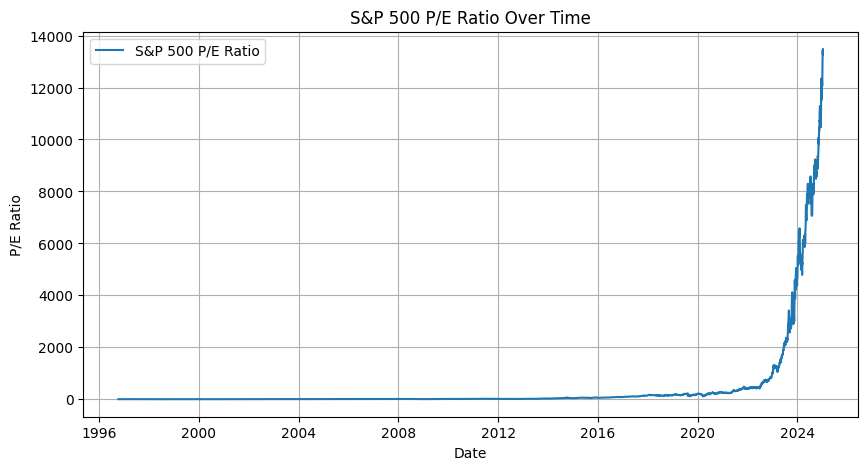

In [6]:
# Visualizar la ratio P/E
# Convert all datetime values to timezone-naive (remove timezone information)
history.index = history.index.tz_localize(None)
# Eliminar valores nulos generados por errores en la conversión
merged_df = merged_df.dropna(subset=["P/E"])

# Graficar nuevamente
plt.figure(figsize=(10, 5))
plt.plot(merged_df.index, merged_df["P/E"], label="S&P 500 P/E Ratio")
plt.title("S&P 500 P/E Ratio Over Time")
plt.xlabel("Date")
plt.ylabel("P/E Ratio")
plt.legend()
plt.grid()
plt.show()